In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

#If you are not running in Google colab notebook, you can skip this cell.

Mounted at /content/drive


In [2]:
# Importing the required packages

import os
import re
import json
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import string
import seaborn as sns
from tqdm import tqdm

# 1. Downloading Datasets



In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2024-11-13 22:30:22--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.138.105, 16.15.185.94, 52.217.162.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.138.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  34.9MB/s    in 5m 36s  

2024-11-13 22:35:57 (38.4 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip

--2024-11-13 22:35:58--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.142.216, 52.217.129.168, 54.231.162.200, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.142.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7239401 (6.9M) [application/zip]
Saving to: ‘v2_Questions_Train_mscoco.zip’

v2_Questions_Train_ 100%[===================>]   6.90M  29.0MB/s    in 0.2s    

2024-11-13 22:35:58 (29.0 MB/s) - ‘v2_Questions_Train_mscoco.zip’ saved [7239401/7239401]



In [ ]:
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip

--2024-11-13 22:35:58--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.128.208, 52.217.228.152, 52.216.216.120, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.128.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21708861 (21M) [application/zip]
Saving to: ‘v2_Annotations_Train_mscoco.zip’

v2_Annotations_Trai 100%[===================>]  20.70M  33.7MB/s    in 0.6s    

2024-11-13 22:35:59 (33.7 MB/s) - ‘v2_Annotations_Train_mscoco.zip’ saved [21708861/21708861]



In [ ]:
import zipfile

with zipfile.ZipFile('train2014.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Hemanth/VQA/Dataset/train2014')

with zipfile.ZipFile('v2_Questions_Train_mscoco.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Hemanth/VQA/Dataset/v2_Questions_Train_mscoco')

with zipfile.ZipFile('v2_Annotations_Train_mscoco.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Hemanth/VQA/Dataset/v2_Annotations_Train_mscoco')

In [ ]:
v2_mscoco_train2014_que = json.load(open(f'/content/drive/MyDrive/Hemanth/VQA/Dataset/v2_Questions_Train_mscoco/v2_OpenEnded_mscoco_train2014_questions.json'))
v2_mscoco_train2014_ans = json.load(open(f'/content/drive/MyDrive/Hemanth/VQA/Dataset/v2_Annotations_Train_mscoco/v2_mscoco_train2014_annotations.json'))

In [ ]:
v2_mscoco_train2014_que.keys()

dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions'])

In [ ]:
v2_mscoco_train2014_que['questions'][0]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [ ]:
v2_mscoco_train2014_ans.keys()

dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type'])

In [ ]:
v2_mscoco_train2014_ans['annotations'][0]

{'question_type': 'what is this',
 'multiple_choice_answer': 'net',
 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 458752,
 'answer_type': 'other',
 'question_id': 458752000}

In [ ]:
train2014_que_df = pd.DataFrame(v2_mscoco_train2014_que['questions'])
train2014_ans_df = pd.DataFrame(v2_mscoco_train2014_ans['annotations'])

In [ ]:
mscoco_train2014_df = pd.merge(train2014_que_df, train2014_ans_df, on=["image_id", "question_id"])

In [ ]:
mscoco_train2014_df.head()

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,458752,What is this photo taken looking through?,458752000,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",other
1,458752,What position is this man playing?,458752001,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",other
2,458752,What color is the players shirt?,458752002,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",other
3,458752,Is this man a professional baseball player?,458752003,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
4,262146,What color is the snow?,262146000,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",other


In [ ]:
cols = ['image_id','question_id','question','question_type','multiple_choice_answer','answers','answer_type']
mscoco_train2014_df = mscoco_train2014_df[cols]

In [ ]:
def image_id_to_path(subset,image_id):
    imdir='%s/COCO_%s_%012d.jpg'
    image_path = imdir%(subset, subset, image_id)
    return image_path

In [ ]:
subset = 'train2014'
image_path = []
for i in (range(len(mscoco_train2014_df))):
    image_path.append(image_id_to_path(subset,mscoco_train2014_df['image_id'][i]))
mscoco_train2014_df['image_id'] = image_path

In [ ]:
mscoco_train2014_df.head()

,image_id,question_id,question,question_type,multiple_choice_answer,answers,answer_type
0,train2014/COCO_train2014_000000458752.jpg,458752000,What is this photo taken looking through?,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",other
1,train2014/COCO_train2014_000000458752.jpg,458752001,What position is this man playing?,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",other
2,train2014/COCO_train2014_000000458752.jpg,458752002,What color is the players shirt?,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",other
3,train2014/COCO_train2014_000000458752.jpg,458752003,Is this man a professional baseball player?,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
4,train2014/COCO_train2014_000000262146.jpg,262146000,What color is the snow?,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",other


In [ ]:
mscoco_train2014_df['answers'][0]

[{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
 {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
 {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}]

In [ ]:
answers_list = []
for i in (range(len(mscoco_train2014_df))):
    ans_list = []
    for dic in (mscoco_train2014_df['answers'][i]):
        ans_list.append(dic['answer'])
    answers_list.append(ans_list)
mscoco_train2014_df['answers'] = answers_list

In [ ]:
#mscoco_train2014_df = pd.read_csv("drive/MyDrive/Hemanth/VQA/mscoco_train2014.csv")

In [ ]:
len(mscoco_train2014_df['image_id'].unique())

82783

In [ ]:
# prompt: I want to count the images in the train2014 folder

import os

train2014_folder = '/content/drive/MyDrive/Hemanth/VQA/Dataset/train2014'  # Replace with your actual path
image_count = len([name for name in os.listdir(train2014_folder) if os.path.isfile(os.path.join(train2014_folder, name))])
print(f"Number of images in train2014 folder: {image_count}")

Number of images in train2014 folder: 82783


Checking whether the count of the images in the dataframe and images in the dataset folder is equal or not. Thankfully both are same.

In [ ]:
mscoco_train2014_df.to_csv("drive/MyDrive/Hemanth/VQA/mscoco_train2014.csv",index=False)



---



# 2. Data Cleaning

## 2.1 Removing special characters

In [8]:
def decontractions(phrase):
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)

    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    phrase = re.sub(r"he\'s", "he is", phrase)
    phrase = re.sub(r"she\'s", "she is", phrase)
    phrase = re.sub(r"it\'s", "it is", phrase)

    return phrase


def text_preprocess(text):
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[-,:]', ' ', text)
    text = re.sub("(?!<=\d)(\.)(?!\d)", '', text)
    text = re.sub('[^A-Za-z0-9. ]+', '', text)
    text = re.sub(' +', ' ', text)
    return text

#Replaces the contraction with orignial form, the characters "-"/ ","/ ":" with space
#Remove all punctuation, except A-Za-z0-9 and extra spaces

Above functions are used to perform preprocessing operation on both answers and questions.

Because This makes the text more accessible and understandable for the model, ultimately leading to better performance in answering questions about images.

In [6]:
mscoco_train2014_df = pd.read_csv("drive/MyDrive/Hemanth/VQA/mscoco_train2014.csv")

In [9]:
mscoco_train2014_df["question_preprocessed"] = mscoco_train2014_df["question"].map(lambda x: text_preprocess(x))
mscoco_train2014_df["answer_preprocessed"] = mscoco_train2014_df["multiple_choice_answer"].map(lambda x: text_preprocess(x))

In [10]:
mscoco_path = "/content/drive/MyDrive/Hemanth/VQA/Dataset/"

question = list(mscoco_train2014_df['question'])
answer = list(mscoco_train2014_df['multiple_choice_answer'])
image_path = list(mscoco_train2014_df['image_id'])

## 2.2 Checking the size of each image

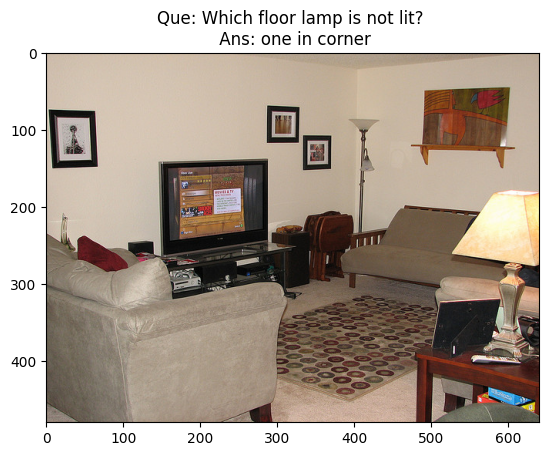

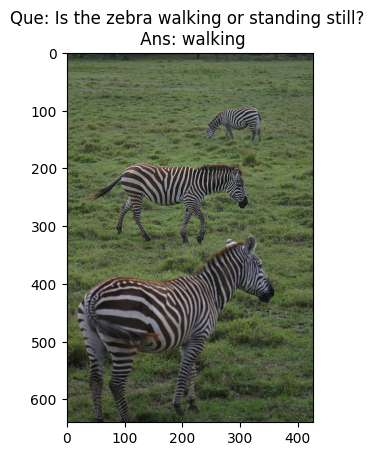

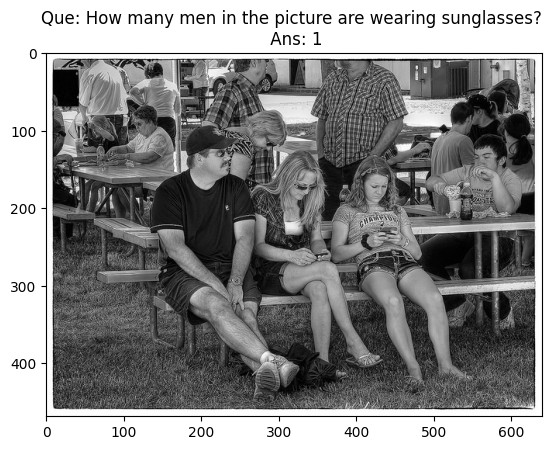

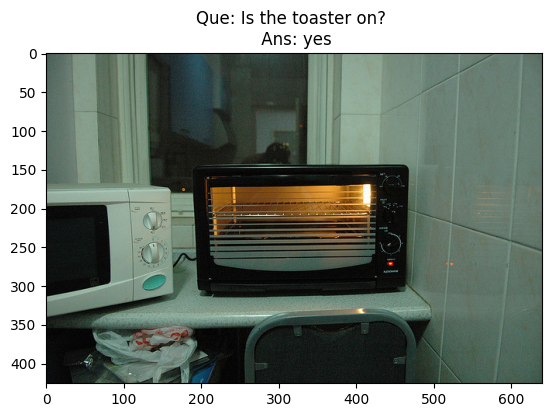

In [ ]:
# Plot sample images, questions and answers
temp = random.sample(range(0, 1000), 4)
for a,i in enumerate(temp):
    image_file = image_path[i].split('/')[-1]
    image = cv2.imread(os.path.join(mscoco_path,"train2014", image_file))

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.title(f'Que: {question[i]} \n Ans: {answer[i]}')
        plt.imshow(image)
        plt.show()

**Observations:**

* Image Shapes: The images vary in dimensions, necessitating an analysis and visualization of their sizes (height and width).
* Question Characteristics: While most questions are straightforward and well-formatted, some incorporate word contractions (e.g., "what's," "it's") or noun contractions (e.g., "guy's"). Additionally, a small number of words include quotation marks (e.g., "Merry").
* Answer Characteristics: The majority of answers are concise, comprising a single word or a number. However, some answers contain punctuation.

In [ ]:
temp

[369, 555, 373, 623]

In [ ]:
len(mscoco_train2014_df)

443757

In [ ]:
def find_punctuation(text):
    punctuation_list = []
    for t in text:
        for i in t:
            if i in string.punctuation:
                punctuation_list.append(i)
    punctuation_list = list(set(punctuation_list))
    return punctuation_list

que_punct_list = find_punctuation(question)
ans_punct_list = find_punctuation(answer)
print(f'{len(que_punct_list)} punctuations found in the Question Dataset:\n{que_punct_list}')
print('-'*100)
print(f'{len(ans_punct_list)} punctuations found in the Answer Dataset:\n{ans_punct_list}')

21 punctuations found in the Question Dataset:
['+', '-', '/', "'", '&', '"', '(', '?', '.', '#', '*', '%', ',', ';', '!', ')', '`', '$', ':', '_', '^']
----------------------------------------------------------------------------------------------------
20 punctuations found in the Answer Dataset:
['+', '-', '/', "'", '&', '"', '(', '?', '.', '#', '*', '%', ',', ';', '!', ')', '$', ':', '_', '@']


**Observations:**

* Punctuation Presence: The question dataset contains 21 different punctuation marks, while the answer dataset contains 20.
* Data Cleaning Necessity: Due to the presence of punctuation, it is essential to clean both the question and answer datasets before conducting Exploratory Data Analysis (EDA).
* Problem Framing: This task will be treated as a multi-class classification problem, where each unique answer represents a distinct class.

In [ ]:
temp = random.sample(range(0, len(mscoco_train2014_df)), 4)
for i in temp:
    print(f'Que: {mscoco_train2014_df["question"][i]}\nAns: {mscoco_train2014_df["multiple_choice_answer"][i]}')
print('\n')
print('-'*40)
print('\n')
for i in temp:
    print(f'Que: {mscoco_train2014_df["question_preprocessed"][i]}\nAns: {mscoco_train2014_df["answer_preprocessed"][i]}')

Que: Is the zebra in a zoo?
Ans: no
Que: What kind of sign is this?
Ans: public market center
Que: How many pizzas are on the stove?
Ans: 3
Que: What kind of building is this?
Ans: lighthouse


----------------------------------------


Que: is the zebra in a zoo
Ans: no
Que: what kind of sign is this
Ans: public market center
Que: how many pizzas are on the stove
Ans: 3
Que: what kind of building is this
Ans: lighthouse


In [11]:
mscoco_train2014_df = mscoco_train2014_df.drop(['question', 'multiple_choice_answer'], axis=1)

cols = ['image_id','question_id','question_preprocessed','question_type','answer_preprocessed','answers','answer_type']
mscoco_train2014_df = mscoco_train2014_df[cols]

print('Number of Question & Answer in MSCOCO Train Dataset:',len(mscoco_train2014_df))
mscoco_train2014_df.head(2)

Number of Question & Answer in MSCOCO Train Dataset: 443757


,image_id,question_id,question_preprocessed,question_type,answer_preprocessed,answers,answer_type
0,train2014/COCO_train2014_000000458752.jpg,458752000,what is this photo taken looking through,what is this,net,"['net', 'net', 'net', 'netting', 'net', 'net',...",other
1,train2014/COCO_train2014_000000458752.jpg,458752001,what position is this man playing,what,pitcher,"['pitcher', 'catcher', 'pitcher', 'pitcher', '...",other


In [12]:
image_path = list(mscoco_train2014_df['image_id'])
question_preprocessed = list(mscoco_train2014_df['question_preprocessed'])
answer_preprocessed = list(mscoco_train2014_df['answer_preprocessed'])
question_type = list(mscoco_train2014_df['question_type'])
answer_type = list(mscoco_train2014_df['answer_type'])

## 2.3 Color type to anser_type column

In [ ]:
import re

def extract_color(answer):
    color_words = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "black", "white", "gray", "grey"]  # Add more color words as needed
    color_matches = re.findall(r'\b(?:' + '|'.join(color_words) + r')\b', answer, re.IGNORECASE)
    return color_matches

In [ ]:
mscoco_train2014_df['answer_type'] = mscoco_train2014_df.apply(lambda row: 'color' if extract_color(row['answer_preprocessed']) else row['answer_type'], axis=1)

In [ ]:
mscoco_train2014_df['answer_type'] = mscoco_train2014_df['answer_type'].apply(lambda x: x if x in ['color', 'yes/no', 'number'] else 'other')

## 2.4 Checking whether are there any duplicate questions for each image

In [ ]:
grouped = mscoco_train2014_df.groupby('image_id')

duplicate_questions_by_image = {}
for image_id, group in grouped:
    duplicates = group[group.duplicated(subset=['question_preprocessed'], keep=False)]
    if not duplicates.empty:
        duplicate_questions_by_image[image_id] = duplicates[['question_preprocessed']].values.tolist()

if duplicate_questions_by_image:
    print("Images with duplicate questions:")
    for image_id, questions in duplicate_questions_by_image.items():
        print(f"Image: {image_id}, Duplicate questions: {questions}")
else:
    print("No images have duplicate questions.")

Images with duplicate questions:
Image: train2014/COCO_train2014_000000000312.jpg, Duplicate questions: [['how many baby elephants are there'], ['how many baby elephants are there']]
Image: train2014/COCO_train2014_000000002614.jpg, Duplicate questions: [['what does the man in the blue shirt have in his hand'], ['what does the man in the blue shirt have in his hand']]
Image: train2014/COCO_train2014_000000003008.jpg, Duplicate questions: [['what color is the womans hair'], ['what color is the womans hair']]
Image: train2014/COCO_train2014_000000005115.jpg, Duplicate questions: [['is the tv on'], ['is the tv on']]
Image: train2014/COCO_train2014_000000011065.jpg, Duplicate questions: [['what color is the horse'], ['what color is the horse']]
Image: train2014/COCO_train2014_000000014766.jpg, Duplicate questions: [['what color are the cats eyes'], ['what color are the cats eyes']]
Image: train2014/COCO_train2014_000000016414.jpg, Duplicate questions: [['what color is the parking meter'], 

In [ ]:
def print_entries_for_image(df, image_id):
  """Prints all entries for a given image ID.

  Args:
    image_id: The ID of the image to search for.
  """

  filtered_df = df[df['image_id'] == image_id]

  if filtered_df.empty:
    print(f"No entries found for image ID: {image_id}")
  else:
    print(f"Entries for image ID: {image_id}")
    for index, row in filtered_df.iterrows():
      print(f"  Question: {row['question_preprocessed']}")
      print(f"  Answer: {row['answer_preprocessed']}")
      # Print other columns as needed

In [ ]:
image_id_to_search = 'train2014/COCO_train2014_000000000312.jpg'  # Replace with the actual image ID
print_entries_for_image(mscoco_train2014_df, image_id_to_search)

Entries for image ID: train2014/COCO_train2014_000000000312.jpg
  Question: is the small elephant touching the big elephant with his trunk
  Answer: no
  Question: how many baby elephants are there
  Answer: 1
  Question: how many elephants are there
  Answer: 6
  Question: how many baby elephants are there
  Answer: 1
  Question: are these elephants in the wild
  Answer: yes
  Question: are they standing in a mud puddle
  Answer: no
  Question: are they endangered
  Answer: yes
  Question: is the ground shades of browntan
  Answer: yes


In [ ]:
grouped_df = mscoco_train2014_df.groupby(['image_id', 'question_preprocessed']).size().reset_index(name='count')
duplicate_questions = grouped_df[grouped_df['count'] > 1]

duplicate_indices = []
for _, row in duplicate_questions.iterrows():
    image_id = row['image_id']
    question = row['question_preprocessed']
    duplicate_indices.extend(
        mscoco_train2014_df[(mscoco_train2014_df['image_id'] == image_id) &
                         (mscoco_train2014_df['question_preprocessed'] == question)].index[1:]
    )

data_df_no_duplicates = mscoco_train2014_df.drop(duplicate_indices, axis=0)

print("Original DataFrame shape:", mscoco_train2014_df.shape)
print("De-duplicated DataFrame shape:", data_df_no_duplicates.shape)

Original DataFrame shape: (443757, 7)
De-duplicated DataFrame shape: (443607, 7)


In [ ]:
image_id_to_search = 'train2014/COCO_train2014_000000000312.jpg'  # Replace with the actual image ID
print_entries_for_image(data_df_no_duplicates, image_id_to_search)

Entries for image ID: train2014/COCO_train2014_000000000312.jpg
  Question: is the small elephant touching the big elephant with his trunk
  Answer: no
  Question: how many baby elephants are there
  Answer: 1
  Question: how many elephants are there
  Answer: 6
  Question: are these elephants in the wild
  Answer: yes
  Question: are they standing in a mud puddle
  Answer: no
  Question: are they endangered
  Answer: yes
  Question: is the ground shades of browntan
  Answer: yes


In [ ]:
data_df_no_duplicates.to_csv("drive/MyDrive/Hemanth/VQA/mscoco_train2014_preprocessed.csv",index=False)

# 3. EDA

In [3]:
mscoco_train2014_preprocessed = pd.read_csv("drive/MyDrive/Hemanth/VQA/mscoco_train2014_preprocessed.csv")


## 3.1 EDA for Questions

### 3.1.1 Distribution of Word count, Character count of question

In [13]:
char_count_que = []
word_count_que = []
first_word_que = []
two_word_que = []
unique_word_que = []

for q in question_preprocessed:
    char_count_que.append(len(q))
    word_count_que.append(len(q.split()))
    first_word_que.append(q.split()[0].lower())
    two_word_que.append(" ".join(q.split()[:2]).lower())
    unique_word_que.extend(q.split())
unique_word_que = set(unique_word_que)

<ipython-input-24-e5426f746de7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count_que, color='blue')
<ipython-input-24-e5426f746de7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(char_count_que, color='green')


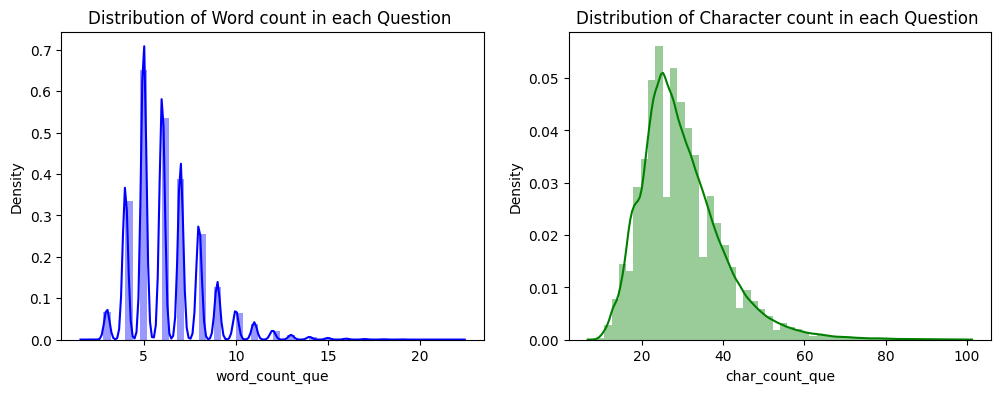

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(word_count_que, color='blue')
plt.title('Distribution of Word count in each Question ')
plt.xlabel('word_count_que')

plt.subplot(1,2,2)
sns.distplot(char_count_que, color='green')
plt.title('Distribution of Character count in each Question ')
plt.xlabel('char_count_que')

plt.show()

In [21]:
# Percentile of word_count_que
for i in range(0,101,10):
    print(f"{i}th percentile {np.percentile(word_count_que,i)}")

0th percentile 2.0
10th percentile 4.0
20th percentile 5.0
30th percentile 5.0
40th percentile 5.0
50th percentile 6.0
60th percentile 6.0
70th percentile 7.0
80th percentile 8.0
90th percentile 9.0
100th percentile 22.0


In [ ]:
print("The maximum word length of Question:", max(word_count_que))
print("The minimum word length of Question:", min(word_count_que))
print('The average word length of Question:',int(sum(word_count_que)/len(word_count_que)))
print('-'*50)
print('Total unique words in questions:',len(unique_word_que))
print('-'*50)
print("The maximum character length of Question:", max(char_count_que))
print("The minimum character length of Question:", min(char_count_que))
print('The average character length of Question:',int(sum(char_count_que)/len(char_count_que)))

The maximum word length of Question: 22
The minimum word length of Question: 2
The average word length of Question: 6
--------------------------------------------------
Total unique words in questions: 13334
--------------------------------------------------
The maximum character length of Question: 99
The minimum character length of Question: 9
The average character length of Question: 29


**Observations:**

* The majority of questions contain 20 to 40 characters.
* A small number of questions exceed 60 characters in length.
* Typically, questions are composed of 4 to 8 words.
* The longest question has 22 words, while the shortest has only 2.
* While most questions have fewer than 10 words, some are longer.

In [ ]:
question_counts = mscoco_train2014_preprocessed.groupby('image_id').size().reset_index(name='question_count')

# Display the results
print(question_counts.sort_values(by=['question_count'], ascending=False))

                                        image_id  question_count
21481  train2014/COCO_train2014_000000150435.jpg             275
37663  train2014/COCO_train2014_000000265622.jpg             176
17677  train2014/COCO_train2014_000000123921.jpg             159
37397  train2014/COCO_train2014_000000263764.jpg             137
58083  train2014/COCO_train2014_000000407465.jpg             130
...                                          ...             ...
4      train2014/COCO_train2014_000000000036.jpg               3
82767  train2014/COCO_train2014_000000581821.jpg               3
82744  train2014/COCO_train2014_000000581668.jpg               3
82749  train2014/COCO_train2014_000000581704.jpg               3
82751  train2014/COCO_train2014_000000581709.jpg               3

[82783 rows x 2 columns]


### 3.1.2 Top 20 images with the most questions

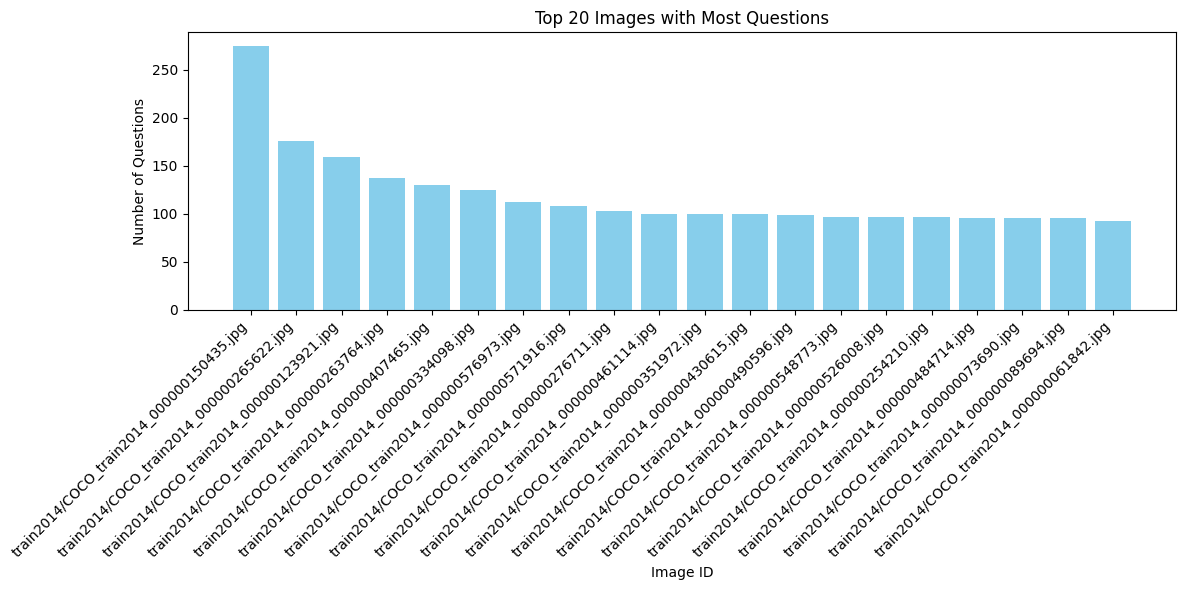

In [ ]:
# Sort question_counts by question_count in descending order
top_images = question_counts.sort_values(by=['question_count'], ascending=False).head(20)  # Get top 10

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(top_images['image_id'], top_images['question_count'], color='skyblue')

# Set labels and title
plt.xlabel('Image ID')
plt.ylabel('Number of Questions')
plt.title('Top 20 Images with Most Questions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 3.1.3 Top 20 images with least number of questions

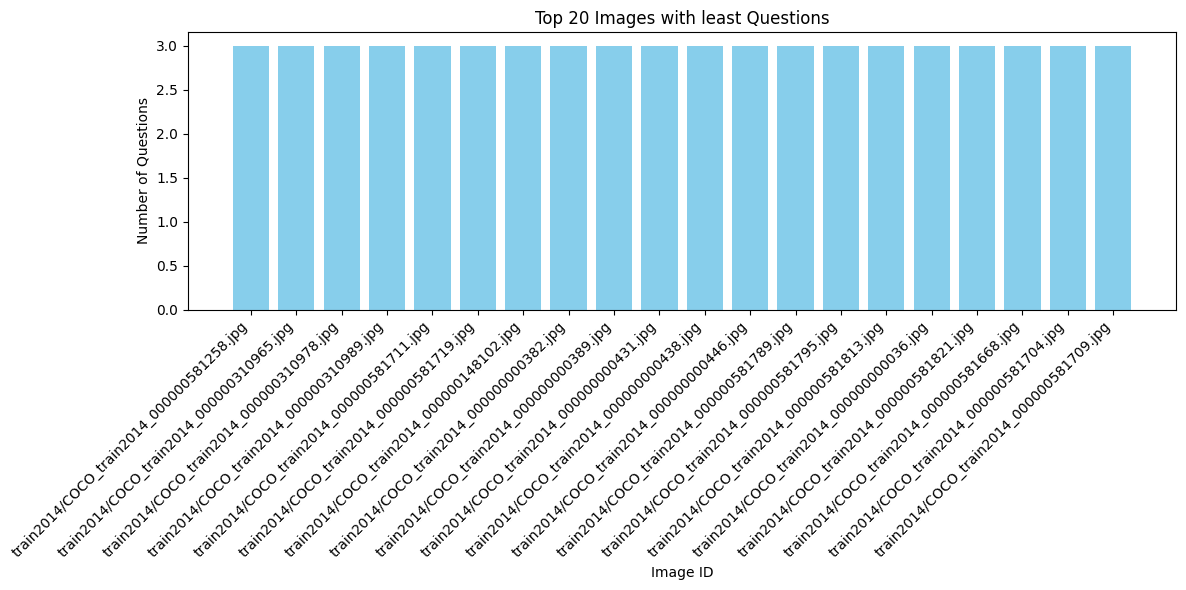

In [ ]:
top_images = question_counts.sort_values(by=['question_count'], ascending=False).tail(20)  # Get bottom 20

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(top_images['image_id'], top_images['question_count'], color='skyblue')

# Set labels and title
plt.xlabel('Image ID')
plt.ylabel('Number of Questions')
plt.title('Top 20 Images with least Questions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
def print_questions_for_image(image_name):
  """Prints all questions for a specified image name.

  Args:
    image_name: The name of the image (including path, e.g., 'train2014/COCO_train2014_000000458752.jpg').
  """
  filtered_df = mscoco_train2014_preprocessed[mscoco_train2014_preprocessed['image_id'] == image_name]
  questions = filtered_df['question_preprocessed'].tolist()

  print(f"Questions for image '{image_name}':")
  for question in questions:
    print(question)

# Example usage:
image_name_to_search = 'train2014/COCO_train2014_000000150435.jpg'  # Replace with the actual image name
print_questions_for_image(image_name_to_search)

Questions for image 'train2014/COCO_train2014_000000150435.jpg':
is this person alone
is the man smiling
is this man writing
who seems more happier
how many people in this photo appear to be holding gaming controllers
what is on the mans wrist
what is in the guys hand
are they inside
what color is his hair
what part of this mans outfit is missing
is this a test waiting room
is the man wearing a tie
what is the person in white t shirt holding
what kind of electronic device is the man using
is anyone else in the room with the man
what color is the old mans shirt
where are the boys sitting
what does the mans shirt say
is this an old person
is it around holiday times in this picture
what are the men looking at
why is this man shirtless
what is the woman playing
what is on the mans right arm
what game is being played by the gentlemen
is this man wearing a black shirt
how many people are in the pic
what sort of room are they in
what room of the house does this item belong in
what are both me

## 3.2  EDA for Answers

### 3.2.1 Distribution of Word count, Character count of Answers

In [14]:
# Create list of Character count, Word count, and unique words of answers
char_count_ans = []
word_count_ans = []
for a in (answer_preprocessed):
    char_count_ans.append(len(a))
    word_count_ans.append(len(a.split()))

unique_ans = set(answer_preprocessed)

<ipython-input-15-4aea81040f8f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count_ans, color='blue')
<ipython-input-15-4aea81040f8f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(char_count_ans, color='green')


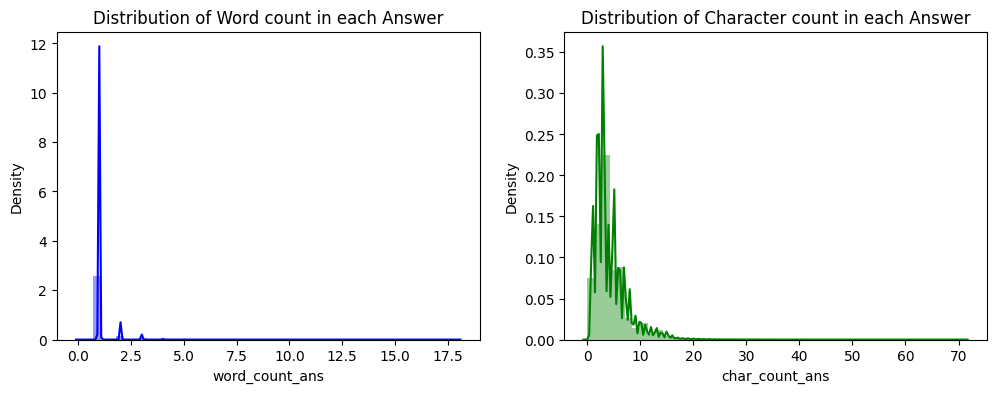

In [15]:
# Plot Distribution of Character count, Word count of answers
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(word_count_ans, color='blue')
plt.title('Distribution of Word count in each Answer')
plt.xlabel('word_count_ans')

plt.subplot(1,2,2)
sns.distplot(char_count_ans, color='green')
plt.title('Distribution of Character count in each Answer')
plt.xlabel('char_count_ans')
plt.show()

In [18]:
# Percentile of word_count_ans
for i in range(0,101,10):
    print(f"{i}th percentile {np.percentile(word_count_ans,i)}")

0th percentile 0.0
10th percentile 1.0
20th percentile 1.0
30th percentile 1.0
40th percentile 1.0
50th percentile 1.0
60th percentile 1.0
70th percentile 1.0
80th percentile 1.0
90th percentile 1.0
100th percentile 18.0


In [19]:
print("The maximum word length of Answer:", max(word_count_ans))
print("The minimum word length of Answer:", min(word_count_ans))
print('The average word length of Answer:',int(sum(word_count_ans)/len(word_count_ans)))
print('-'*50)
print('Total number of unique Answers:',len(unique_ans))
print('-'*50)
print('Types of Answers as per given answer_type:',len(set(answer_type)))
print("The maximum character length of Answer:", max(char_count_ans))
print("The minimum character length of Answer:", min(char_count_ans))
print('The average character length of Answer:',int(sum(char_count_ans)/len(char_count_ans)))

The maximum word length of Answer: 18
The minimum word length of Answer: 0
The average word length of Answer: 1
--------------------------------------------------
Total number of unique Answers: 22348
--------------------------------------------------
Types of Answers as per given answer_type: 3
The maximum character length of Answer: 71
The minimum character length of Answer: 0
The average character length of Answer: 4


**Observations:**

* Most answers are short, with the vast majority (92%) consisting of a single word. A slightly higher percentage (97%) have two words or less, and almost all answers (99%) contain three words or fewer.
* Answer word length varies, ranging from a minimum of 1 word to a maximum of 18 words.
* Similarly, answer character length varies, from a minimum of 1 character to a maximum of 71 characters.
* The dataset categorizes answers into 3 distinct types based on a provided "answer_type" feature.

### 3.2.2 Distribution of Answer Counts per Image - Question Pair

In [ ]:
image_question_answer_counts = mscoco_train2014_preprocessed.groupby(['image_id', 'question_preprocessed']).size().reset_index(name='answer_count')

print(image_question_answer_counts.sort_values(by=['answer_count'], ascending=False))

                                         image_id  \
319438  train2014/COCO_train2014_000000418397.jpg   
371741  train2014/COCO_train2014_000000487090.jpg   
371742  train2014/COCO_train2014_000000487090.jpg   
15599   train2014/COCO_train2014_000000021061.jpg   
164454  train2014/COCO_train2014_000000215522.jpg   
...                                           ...   
147881  train2014/COCO_train2014_000000193682.jpg   
147880  train2014/COCO_train2014_000000193677.jpg   
147879  train2014/COCO_train2014_000000193677.jpg   
147878  train2014/COCO_train2014_000000193677.jpg   
147891  train2014/COCO_train2014_000000193682.jpg   

                             question_preprocessed  answer_count  
319438                   what number is the batter             2  
371741                 what color is the boys hair             2  
371742                what color is the boys shirt             2  
15599                  how many giraffes are there             2  
164454                      

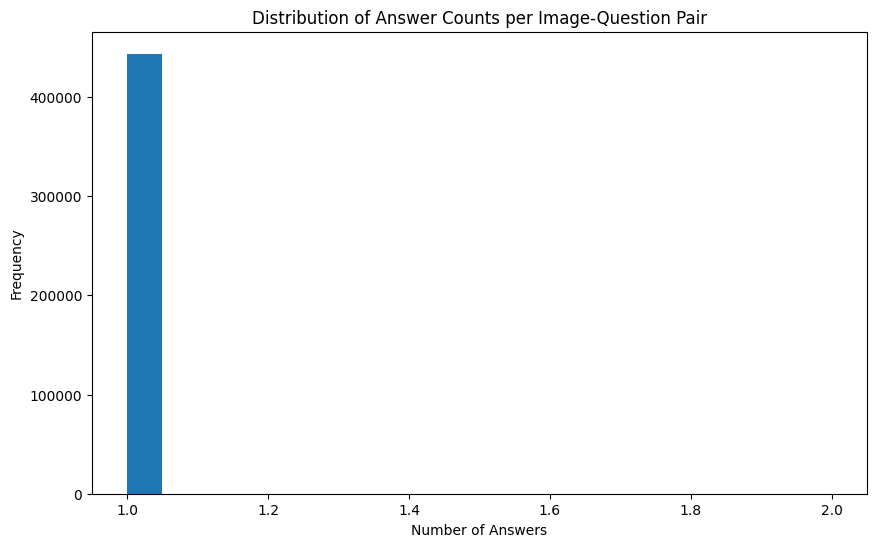

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(image_question_answer_counts['answer_count'], bins=20)
plt.xlabel('Number of Answers')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Counts per Image-Question Pair')
plt.show()

### 3.2.3 Distribution of Answer type



In [20]:
answer_type_df = (mscoco_train2014_preprocessed.groupby(['answer_type']).count()['answers']).to_frame()
answer_type_df['answer%'] = round(answer_type_df['answers'] / len(answer_type) * 100,2)
answer_type_df = answer_type_df.sort_values(by='answers',ascending=False)
answer_type_df

,answers,answer%
answer_type,,
other,174763,39.38
yes/no,166843,37.60
number,57574,12.97
color,44427,10.01


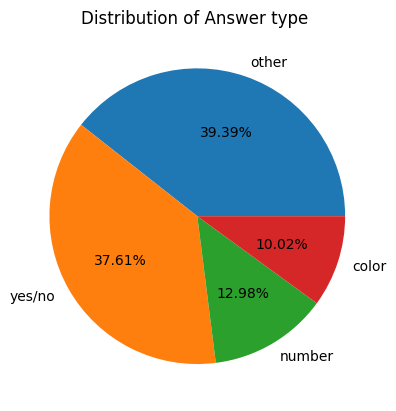

In [ ]:
plt.pie(list(answer_type_df['answer%']), labels=list(answer_type_df.index), autopct='%1.2f%%', startangle=0)
plt.title('Distribution of Answer type ')
plt.show()

### 3.2.4 Count of top 20 answers

In [ ]:
count = {}
for i in answer_preprocessed:
    count[i] = count.get(i, 0) + 1

answer_df = pd.DataFrame(list(count.items()),columns=["answer","answer_count"])
answer_df["answer%"] = answer_df["answer_count"]/len(answer_preprocessed)*100
answer_df = answer_df.sort_values(by='answer_count',ascending=False)
answer_df.head(10)

,answer,answer_count,answer%
3,yes,84978,19.149670
11,no,82516,18.594862
15,1,12541,2.826096
20,2,12215,2.752633
4,white,8916,2.009208
38,3,6536,1.472878
16,blue,5455,1.229276
6,red,5201,1.172038
36,black,5066,1.141616
96,0,4977,1.121560


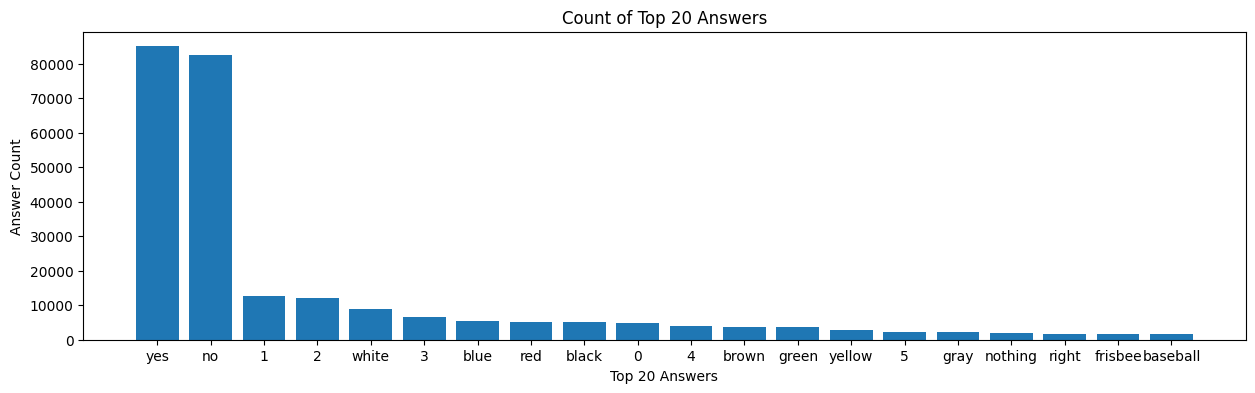

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(list(answer_df['answer'])[:20], list(answer_df['answer_count'])[:20])
plt.title('Count of Top 20 Answers')
plt.xlabel('Top 20 Answers')
plt.ylabel('Answer Count')
plt.xticks(list(answer_df['answer'])[:20])
plt.show()

In [ ]:
print(f"Top 1000 answers coverd {round(sum(list(answer_df['answer%'][:1000])),2)}% of datapoints")
print(f"Top 2000 answers coverd {round(sum(list(answer_df['answer%'][:2000])),2)}% of datapoints")
print(f"Top 3000 answers coverd {round(sum(list(answer_df['answer%'][:3000])),2)}% of datapoints")

Top 1000 answers coverd 87.5% of datapoints
Top 2000 answers coverd 91.26% of datapoints
Top 3000 answers coverd 93.11% of datapoints


In [ ]:
for i,a in enumerate(answer_preprocessed):
    if len(a.split()) >= 10:
        print('Que:',question_preprocessed[i])
        print('Ans:',a)
        print('Length of Ans:',len(a.split()))
        print("-"*50)

Que: what we can read from the picture
Ans: meter remains as courtesy to cyclists please pay at pay box
Length of Ans: 11
--------------------------------------------------
Que: what does the box say
Ans: i want to have my cake and eat it and i want you to think i lost weight
Length of Ans: 18
--------------------------------------------------
Que: what do the signs say
Ans: stadium cage no spikes in batting cage turf shoes only
Length of Ans: 10
--------------------------------------------------
Que: which numbers can you make out
Ans: 1 2 3 4 5 6 7 8 9 0
Length of Ans: 10
--------------------------------------------------
Que: what does the first sign say
Ans: please make sure that bag you claim is yours as many bags look alike
Length of Ans: 14
--------------------------------------------------
Que: what does the sign say
Ans: if you hit this sign you will hit that bridge
Length of Ans: 10
--------------------------------------------------
Que: what are these people doing
Ans: one m

## 3.3 EDA For Question and Answers

In [23]:
# Create dataframe of first two words of question and its most common answers
question_df = pd.DataFrame(question_preprocessed,columns=["question"])
question_split_df = question_df['question'].str.split(" ", expand = True)
question_answer_df = question_split_df.iloc[:,:-20]
question_answer_df['answer'] = answer

def que_ans_analysis2(word_1,word_2):
    word_1_2_df = question_answer_df[(question_answer_df[0] == word_1) & (question_answer_df[1] == word_2)]
    word_1_2_count = (word_1_2_df.groupby(['answer']).count()[0]).to_frame()
    word_1_2_count = word_1_2_count.sort_values(by=0,ascending=False)

    plt.figure(figsize=(20,4))
    plt.bar(list(word_1_2_count.index)[:20], list(word_1_2_count[0])[:20])
    plt.title('Count of Top 20 Answers of "'+word_1+' '+word_2+'" questions')
    plt.xlabel('Top 20 Answers of "'+word_1+' '+word_2+'" questions')
    plt.ylabel('Count')
    plt.xticks(list(word_1_2_count.index)[:20])
    plt.show()

<ipython-input-23-0eed95caaae9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_answer_df['answer'] = answer


### 3.3.1 Count of top 20 answers for the questions which starts with "is it"

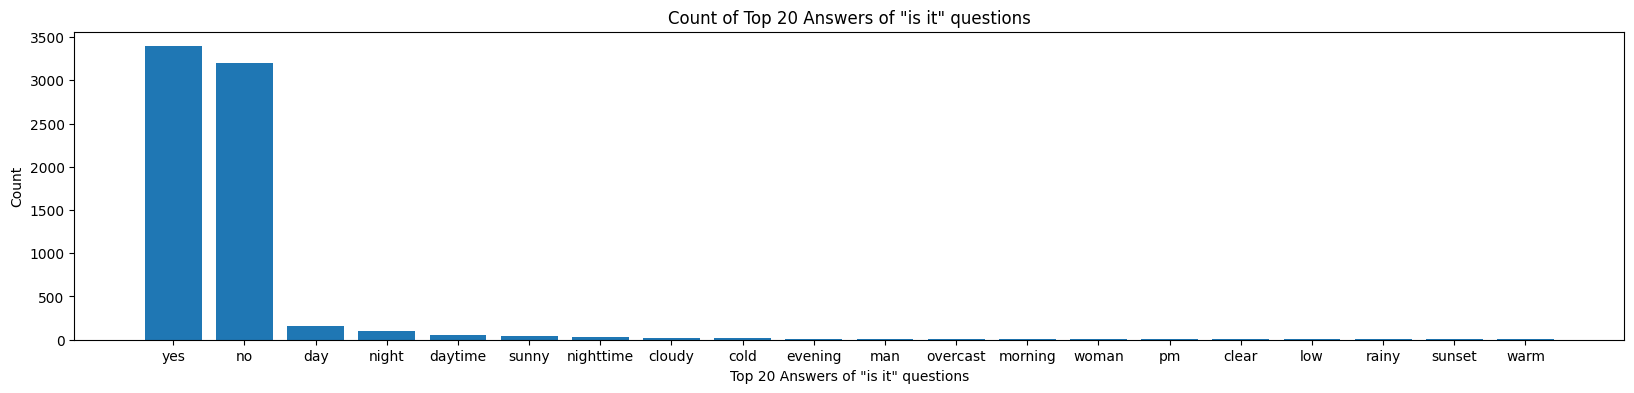

In [24]:
que_ans_analysis2("is","it")

### 3.3.2 Count of top 20 answers for the questions which starts with "What is"

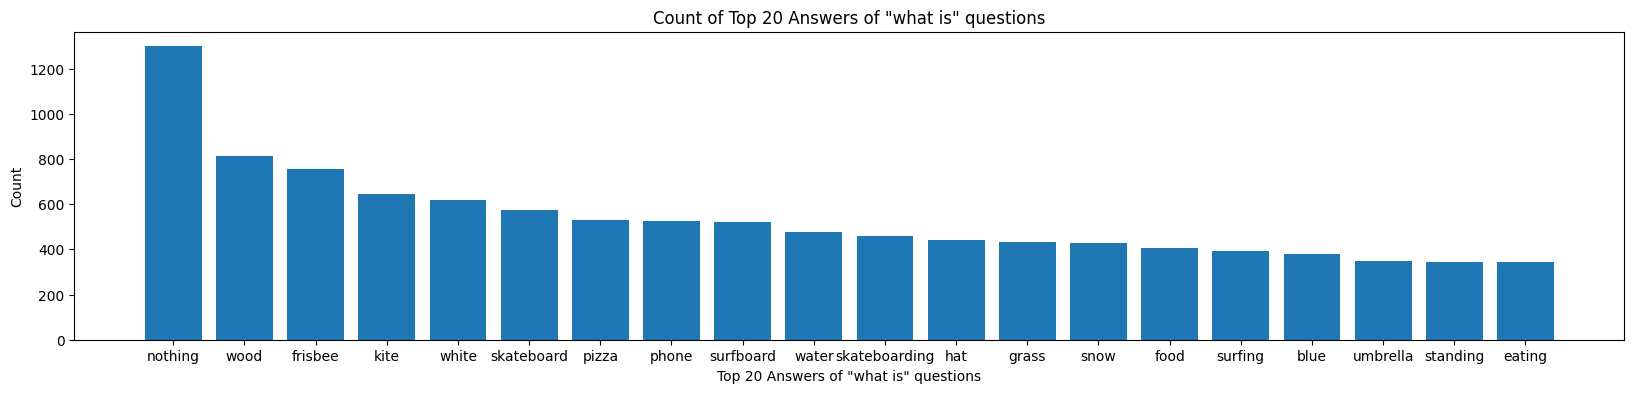

In [25]:
que_ans_analysis2("what","is")

### 3.3.3 Count of top 20 answers for the questions which starts with "What color"

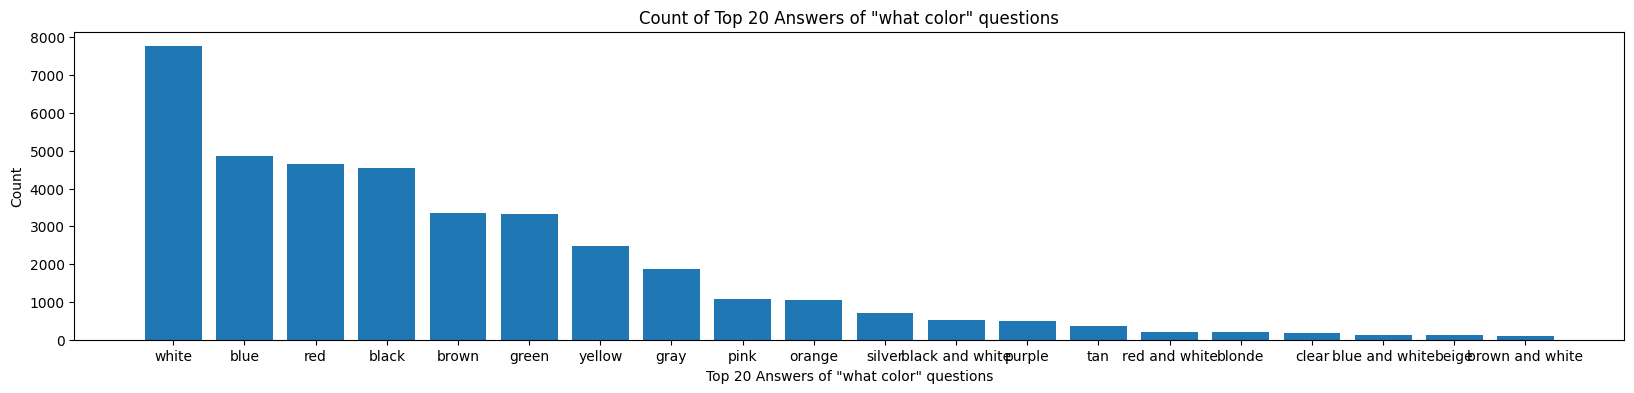

In [26]:
que_ans_analysis2("what","color")

## 3.4 EDA for Images

In [ ]:
image_shape = []
for i in tqdm(range(len(mscoco_train2014_preprocessed))):
    image = cv2.imread(os.path.join(mscoco_path,"train2014", image_path[i]))
    image_shape.append(image.shape)

100%|██████████████████████████████████| 443757/443757 [12:50<00:00, 576.01it/s]


/var/folders/b6/c0ss6qd57xn3q3cgmnx4pxy40000gn/T/ipykernel_1815/323389714.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(height, color='red')
/Users/avss/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avss/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_

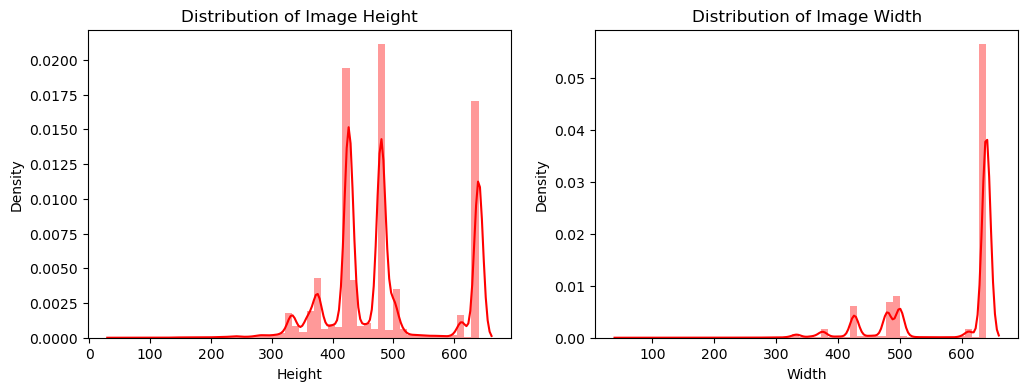

In [ ]:
height = list((list(zip(*image_shape)))[0])
width = list((list(zip(*image_shape)))[1])
channel = list((list(zip(*image_shape)))[2])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(height, color='red')
plt.title('Distribution of Image Height')
plt.xlabel('Height')
plt.subplot(1,2,2)
sns.distplot(width, color='red')
plt.title('Distribution of Image Width')
plt.xlabel('Width')
plt.show()

# 4. Model Training

## 4.0 Importing Required Packages

In [ ]:
mscoco_train2014_preprocessed = pd.read_csv("drive/MyDrive/Hemanth/VQA/mscoco_train2014_preprocessed.csv")

In [ ]:
!pip install imgaug

In [ ]:
!pip install tensorflow

In [ ]:
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import imgaug.augmenters as iaa
import tensorflow as tf
import cv2
from tqdm import tqdm
import os
from keras.layers import Input, Dense, LSTM, Flatten, Dropout, concatenate, Conv1D, MaxPooling2D, Activation, Embedding, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import PIL
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import register_keras_serializable

In [ ]:
print("Unique number of answers of MSCOCO Dataset:",len(set(mscoco_train2014_preprocessed['answer_preprocessed'])))
print("Unique set of answers of MSCOCO Dataset:",set(mscoco_train2014_preprocessed['answer_preprocessed']))

Unique number of answers of MSCOCO Dataset: 22348
Unique set of answers of MSCOCO Dataset: {'fridge door', 'it is getting dark', 'livestock judges stewards reception', 'cheesecake factory', 'daisies', 'belle vue', 'french bulldog', '765chopper 246.7737', 'neon lights', 'to protect from rain', 'lowes foods', '2 33', 'no luggage', 'shirt and hat', 'prisoner', 'clothespin', 'restaurants', 'taking off', 'keep elephant in', 'keep away from kids', 'salem', 'lily', 'les miserables', 'insulation', 'blanket', 'riding bike', 'unlocking meter', 'on surfboard', 'family', 'cameron', 'apprentice', 'dog movie', 'chuck e cheese', '09192008', 'cutting hair', 'zot zot zot', 'hibiscus', 'swiss cross', 'flames', 'for photo', 'umbrella woman', 'd ekcw', 'piano', 'fanta', '8 09', 'wolf', 'air force base', 'in middle', 'wrench', 'cliff', 'not strong', 'sidewalk surfer girl', '109', 'plastic bottle', 'mulliken', 'fat cats', 'his outfit', 'getting ball', 'show off money', 'real estate', 'genuine chevrolet', 't

In [ ]:
# create dataframe of unique answers and its counts in decending order of answer_count
answer_preprocessed = list(mscoco_train2014_preprocessed['answer_preprocessed'])
count = {}
for i in answer_preprocessed:
    count[i] = count.get(i, 0) + 1

answer_df = pd.DataFrame(list(count.items()),columns=["answer","answer_count"])
answer_df["answer%"] = answer_df["answer_count"]/len(answer_preprocessed)*100
answer_df = answer_df.sort_values(by='answer_count',ascending=False)
answer_df.head(5)

,answer,answer_count,answer%
3,yes,84958,19.151636
11,no,82497,18.596866
15,1,12537,2.826150
20,2,12211,2.752662
4,white,8910,2.008535


In [ ]:
# Consider top 1000 answers as class label
top_1000_answers = list(answer_df['answer'])[:1000]

data_df = pd.DataFrame()
for i in (range(len(top_1000_answers))):
  data_df = pd.concat([data_df, mscoco_train2014_preprocessed[mscoco_train2014_preprocessed.answer_preprocessed == top_1000_answers[i]]])

print(f"Top 1000 answers coverd {round(len(data_df)/443607*100,2)}% of datapoints")
try:
  labelencoder = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/labelencoder.pkl', 'rb'))
except FileNotFoundError:
  labelencoder = preprocessing.LabelEncoder()
  labelencoder.fit(top_1000_answers)
  pickle.dump((labelencoder),open('/content/drive/MyDrive/Hemanth/VQA/model/labelencoder.pkl','wb'))

data_df['class_label'] = labelencoder.transform(list(data_df['answer_preprocessed']))
print("Number of Class Labels:",len(labelencoder.classes_))

Top 1000 answers coverd 87.49% of datapoints
Number of Class Labels: 1000


In [ ]:
data_df = data_df.drop(['question_id', 'question_type', 'answer_type'], axis=1)
print("Number of datapoints of final dataset:",len(data_df))

Number of datapoints of final dataset: 388133


In [ ]:
data_df.head(10)

,image_id,question_preprocessed,answer_preprocessed,answers,class_label
3,train2014/COCO_train2014_000000458752.jpg,is this man a professional baseball player,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes...",995
8,train2014/COCO_train2014_000000524291.jpg,is the dog waiting,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
10,train2014/COCO_train2014_000000393221.jpg,is the sky blue,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
11,train2014/COCO_train2014_000000393221.jpg,is there snow on the mountains,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
13,train2014/COCO_train2014_000000393223.jpg,is the window open,yes,"['yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes'...",995
16,train2014/COCO_train2014_000000393223.jpg,is she brushing,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
23,train2014/COCO_train2014_000000524297.jpg,judging from the dress was this taken in a lat...,yes,"['yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no'...",995
27,train2014/COCO_train2014_000000393227.jpg,does the guy have a tattoo,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
33,train2014/COCO_train2014_000000131084.jpg,is the man riding on a dirt path,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
37,train2014/COCO_train2014_000000131074.jpg,are the walls done in a summery color,yes,"['no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',...",995


In [ ]:
data_df.to_csv("/content/drive/MyDrive/Hemanth/VQA/model/Data/mscoco_train2014_preprocessed_k1000.csv",index=False)

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Hemanth/VQA/model/Data/mscoco_train2014_preprocessed_k1000.csv")

In [ ]:
X = data_df[['image_id','question_preprocessed','answers']]
y = data_df['class_label']
print('X.shape:',X.shape)
print('y.shape:',y.shape)

data_df.groupby(by='class_label').count()

X.shape: (388133, 3)
y.shape: (388133,)


,image_id,question_preprocessed,answer_preprocessed,answers
class_label,,,,
0,4977,4977,4977,4977
1,12537,12537,12537,12537
2,986,986,986,986
3,28,28,28,28
4,41,41,41,41
...,...,...,...,...
995,84958,84958,84958,84958
996,98,98,98,98
997,342,342,342,342


## 4.1 Take sampled 50000 datapoints

In [ ]:
data_df_k1000 = pd.read_csv("/content/drive/MyDrive/Hemanth/VQA/model/Data/mscoco_train2014_preprocessed_k1000.csv")
data_df_k1000.head(3)

,image_id,question_preprocessed,answer_preprocessed,answers,class_label
0,train2014/COCO_train2014_000000458752.jpg,is this man a professional baseball player,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes...",995
1,train2014/COCO_train2014_000000524291.jpg,is the dog waiting,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995
2,train2014/COCO_train2014_000000393221.jpg,is the sky blue,yes,"['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",995


In [ ]:
X = data_df_k1000[['image_id','question_preprocessed','answer_preprocessed','answers','class_label']]
y = data_df_k1000['class_label']
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X_, X_50k, y_, y_50k = train_test_split(X, y, test_size=0.1314, stratify=y, random_state=42)
print('X_50k.shape:',X_50k.shape)
print('y_50k.shape:',y_50k.shape)

X.shape: (388133, 5)
y.shape: (388133,)
X_50k.shape: (51001, 5)
y_50k.shape: (51001,)


In [ ]:
X_50k.to_csv("/content/drive/MyDrive/Hemanth/VQA/model/Data/mscoco_train2014_preprocessed_k1000_50k.csv",index=False)

In [ ]:
data_df_50k = pd.read_csv("/content/drive/MyDrive/Hemanth/VQA/model/Data/mscoco_train2014_preprocessed_k1000_50k.csv")

X = data_df_50k[['image_id','question_preprocessed', 'answers']]
y = data_df_50k['class_label']
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (51001, 3)
y.shape: (51001,)


In [ ]:
# perform train validation & test split on the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, stratify=y_train, random_state=42)

pickle.dump((X_train,y_train),open('/content/drive/MyDrive/Hemanth/VQA/model/train_50k_0711.pkl','wb'))
pickle.dump((X_val,y_val),open('/content/drive/MyDrive/Hemanth/VQA/model/val_50k_0711.pkl','wb'))
pickle.dump((X_test,y_test),open('/content/drive/MyDrive/Hemanth/VQA/model/test_50k_0711.pkl','wb'))

X_train,y_train = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/train_50k_0711.pkl', 'rb'))
X_val,y_val = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/val_50k_0711.pkl', 'rb'))
X_test,y_test = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_50k_0711.pkl', 'rb'))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Convert a class vector y_train and y_test to binary class matrix
Y_train = to_categorical(y_train, 1000)
Y_val = to_categorical(y_val, 1000)
Y_test = to_categorical(y_test, 1000)

(41310, 3) (41310,)
(5101, 3) (5101,)
(4590, 3) (4590,)


## 4.2 Text Vectorization

In [ ]:
t = Tokenizer(filters='')
t.fit_on_texts(list(X_train['question_preprocessed']))
vocab_size = len(t.word_index) + 1

pickle.dump((t),open('/content/drive/MyDrive/Hemanth/VQA/model/tokenizer_50k.pkl','wb'))

train_sequences = t.texts_to_sequences(list(X_train['question_preprocessed']))
train_padded_docs = pad_sequences(train_sequences, maxlen=22, padding='post')

val_sequences = t.texts_to_sequences(list(X_val['question_preprocessed']))
val_padded_docs = pad_sequences(val_sequences, maxlen=22, padding='post')

test_sequences = t.texts_to_sequences(list(X_test['question_preprocessed']))
test_padded_docs = pad_sequences(test_sequences, maxlen=22, padding='post')

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip -P /content/drive/MyDrive/Hemanth/VQA/model/Data/glove_vectors/
!unzip /content/drive/MyDrive/Hemanth/VQA/model/Data/glove_vectors/glove.6B.zip -d /content/drive/MyDrive/Hemanth/VQA/model/Data/glove_vectors/

--2024-11-14 05:42:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-14 05:42:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-14 05:42:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/content/drive/MyDr

In [ ]:
embeddings_index = {}
with open('/content/drive/MyDrive/Hemanth/VQA/model/Data/glove_vectors/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
with open('/content/drive/MyDrive/Hemanth/VQA/model/Data/glove_vectors/glove_vectors.pkl', 'wb') as f:
    pickle.dump(embeddings_index, f)

In [ ]:
f = open('/content/drive/MyDrive/Hemanth/VQA/model/Data/glove_vectors/glove_vectors.pkl', 'rb')
glovevector = pickle.load(f)
print('Type:',type(glovevector))
print('Size:',len(glovevector))
print('Dim:',glovevector['language'].shape)

Type: <class 'dict'>
Size: 400000
Dim: (100,)


In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = glovevector.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(6114, 100)


## 4.3 Data Generator Function

In [ ]:
aug1 = iaa.Fliplr(0.5)
aug2 = iaa.AddToBrightness((-30,-20))
aug3 = iaa.LinearContrast((0.6, 0.75))
aug4 = iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 1.0)))

In [ ]:
class CustomDataGen_aug(tf.keras.utils.Sequence):

    def __init__(self, X_que, X_img, y,
                 batch_size,
                 shuffle=True):

        self.X_que = X_que
        self.X_img = X_img
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(y))

    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

    def __get_input1(self, que):

        que_arr = (pad_sequences(t.texts_to_sequences([que]), maxlen=22, padding='post'))[0]
        return que_arr

    def __get_input2(self, path):
      # Ensure path is a string before using load_img
      img_path = os.path.join(colab_path, path)  # Convert path to string if it's not already
      img = image.load_img(img_path, target_size=(224, 224))
      img = image.img_to_array(img)
      img = img.astype(np.uint8)
      a = random.random()
      if a < 0.25:
          img = aug1.augment_image(img)
      elif a < 0.5:
          img = aug2.augment_image(img)
      elif a < 0.75:
          img = aug3.augment_image(img)
      else:
          img = aug4.augment_image(img)
      img = img.astype(np.float32)
      img = img/255.0
      return img

    def __get_output(self, label):
        return tf.keras.utils.to_categorical(label, num_classes=1000)

    def __getitem__(self, index):

        batch_x0 = self.X_que[index * self.batch_size:(index + 1) * self.batch_size]
        batch_x1 = self.X_img[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]

        X0_batch = np.asarray([self.__get_input1(que) for que in batch_x0])
        X1_batch = np.asarray([self.__get_input2(path) for path in batch_x1])
        y_batch = np.asarray([self.__get_output(c) for c in batch_y])

        return tuple([X0_batch, X1_batch]), y_batch

    def __len__(self):
        return len(self.indexes) // self.batch_size


In [ ]:
class CustomDataGen(tf.keras.utils.Sequence):

    def __init__(self, X_que, X_img, y,
                 batch_size,
                 shuffle=True):

        self.X_que = X_que
        self.X_img = X_img
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(y))

    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

    def __get_input1(self, que):

        que_arr = (pad_sequences(t.texts_to_sequences([que]), maxlen=22, padding='post'))[0]
        return que_arr

    def __get_input2(self, path):
      img_path = os.path.join(colab_path, path)
      img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) # Ensure target_size is set
      img = tf.keras.preprocessing.image.img_to_array(img)
      # You might need to normalize pixel values if not already done
      img = img / 255.0  # Example normalization
      return img

    def __get_output(self, label):
        return tf.keras.utils.to_categorical(label, num_classes=1000)

    def __getitem__(self, index):

        batch_x0 = self.X_que[index * self.batch_size:(index + 1) * self.batch_size]
        batch_x1 = self.X_img[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]

        X0_batch = np.asarray([self.__get_input1(que) for que in batch_x0])
        X1_batch = np.asarray([self.__get_input2(path) for path in batch_x1])
        y_batch = np.asarray([self.__get_output(c) for c in batch_y])

        return tuple([X0_batch, X1_batch]), y_batch

    def __len__(self):
        return len(self.indexes) // self.batch_size

In [ ]:
colab_path = "/content/drive/MyDrive/Hemanth/VQA/Dataset"

batch_siz = 128
traingen = CustomDataGen_aug(list(X_train['question_preprocessed']),list(X_train['image_id']),list(y_train),batch_size=batch_siz)
valgen = CustomDataGen(list(X_val['question_preprocessed']),list(X_val['image_id']),list(y_val),batch_size=batch_siz)

## 4.4 Create features for Image Test Data

In [ ]:
def Dataset(colab_path, que, image_id, y, shape):
    img_path = os.path.join(colab_path, image_id)
    img = cv2.imread(img_path)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Could not load image at path: {img_path}")
        return None, None, None

    # Resize the image to a consistent shape
    img = cv2.resize(img, (shape, shape), interpolation=cv2.INTER_NEAREST)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_vector = (img / 255.0).astype(np.float32)

    que_vector = (pad_sequences(t.texts_to_sequences([que]), maxlen=22, padding='post'))[0]
    que_vector = np.asarray(que_vector).astype(np.float32)

    y = tf.one_hot(tf.cast(int(y), tf.uint8), 1000)
    y = np.asarray(y).astype(np.float32)

    return que_vector, image_vector, y

In [ ]:
# Ensure consistent data collection
test_image = []
test_que = []
Y_test = []

for i in tqdm(range(len(X_test))):
    que, image, y = Dataset(colab_path, list(X_test['question_preprocessed'])[i],
                            list(X_test['image_id'])[i], list(y_test)[i], 224)

    if image is not None:  # Check for successful image processing
        test_image.append(image)
        test_que.append(que)
        Y_test.append(y)
    else:
        print(f"Skipping image with index {i} due to loading error or incorrect shape.")

# Convert lists to arrays
test_image = np.array(test_image).astype(np.float32)
test_que = np.array(test_que).astype(np.float32)
Y_test = np.array(Y_test).astype(np.float32)

100%|██████████| 4590/4590 [19:13<00:00,  3.98it/s]


In [ ]:
pickle.dump((test_image),open('/content/drive/MyDrive/Hemanth/VQA/model/test_image_50k_0711.pkl','wb'))
pickle.dump((test_que),open('/content/drive/MyDrive/Hemanth/VQA/model/test_que_50k_0711.pkl','wb'))
pickle.dump((Y_test),open('/content/drive/MyDrive/Hemanth/VQA/model/test_Y_50k_0711.pkl','wb'))

#If you are running the code for the first time run the above line if you have already created .pkl file run below lines
# test_image= pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_image_50k_0711.pkl', 'rb'))
# test_que = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_que_50k_0711.pkl', 'rb'))
# Y_test = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_Y_50k_0711.pkl', 'rb'))
test_que = test_padded_docs

## 4.5 Model Training

In [ ]:
#  Research Paper Link: https://arxiv.org/pdf/1505.00468.pdf

labelencoder = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/labelencoder.pkl', 'rb'))

def accuracy_metric(X,Y,encoded_features,model):

  predicted_Y = model.predict(encoded_features,verbose=0)
  predicted_class = tf.argmax(predicted_Y, axis=1, output_type=tf.int32)
  predicted_ans = labelencoder.inverse_transform(predicted_class)

  acc_val_lst = []
  for i in tqdm(range(len(Y))):
    acc_val = 0.0
    temp = 0

    for actual_ans in (list(X['answers'])[i]).split(","):
      if actual_ans == predicted_ans[i]:
        temp += 1

    if temp >= 3:
      acc_val = 1
    else:
      acc_val = float(temp)/3

    acc_val_lst.append(acc_val)

  return (sum(acc_val_lst)/len(Y))*100

In [ ]:
@register_keras_serializable()
def custom_multiply(inputs):
    return inputs[0] * inputs[1]

def create_vqa_model(vocab_size, embedding_matrix):
    # Freeze VGG19 and add regularization
    regularizer = tf.keras.regularizers.l2(0.01)
    pre_trained_model = VGG19(input_shape=(224, 224, 3), include_top=True, weights="imagenet", pooling='avg')

    for layer in pre_trained_model.layers:
        layer.trainable = False
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

    # Image feature extraction
    vgg19_fc2_output = (pre_trained_model.get_layer('fc2')).output
    img = Dense(units=1024, activation='relu', kernel_initializer='he_normal')(vgg19_fc2_output)
    img = Dropout(0.2)(img)

    # Question processing
    input_layer_que = Input(shape=(22,))
    embedding = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=22, trainable=False)(input_layer_que)
    lstm1 = LSTM(64, return_sequences=True)(embedding)
    dropout1 = Dropout(0.5)(lstm1)
    lstm2 = LSTM(64)(dropout1)
    dropout2 = Dropout(0.5)(lstm2)
    que = Dense(units=1024, activation='relu', kernel_initializer='he_normal')(dropout2)

    # Pointwise multiplication with explicit output shape
    pointwise_mul = Lambda(custom_multiply, output_shape=(1024,))([que, img])

    # Final classification layer
    output = Dense(units=1000, activation='softmax', kernel_initializer="glorot_uniform")(pointwise_mul)

    # Create model
    model = Model(inputs=[input_layer_que, pre_trained_model.input], outputs=output)

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model_lstm_vgg19 = create_vqa_model(vocab_size, embedding_matrix)
model_lstm_vgg19.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 224, 224, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 224, 224, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 112, 112, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 112, 112, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 112, 112, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 56, 56, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 56, 56, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv4 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 28, 28, 256)    │              0 │ block3_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 28, 28, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv4 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 14, 14, 512)    │              0 │ block4_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)

 Total params: 145,543,792 (555.21 MB)

 Trainable params: 5,362,152 (20.45 MB)

 Non-trainable params: 140,181,640 (534.75 MB)

In [ ]:
checkpoint_filepath="/content/drive/MyDrive/Hemanth/VQA/model/model_VQA6.0/weights-{epoch:02d}-{val_accuracy:.4f}.weights.h5" # Change file extension
# Set save_weights_only=True to save only the model weights in HDF5 format
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max', save_weights_only=True)

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/Hemanth/VQA/model/Data/LSTM_VGG19_T5.csv', append=True)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [ ]:
history_lstm_vgg19 = model_lstm_vgg19.fit(traingen,
                                          batch_size=128,
                                          epochs=200,
                                          verbose=1,
                                          validation_data=valgen,
                                          callbacks=[model_checkpoint_callback,
                                                     csv_logger,
                                                     early_stopping])
model_lstm_vgg19.save('/content/drive/MyDrive/Hemanth/VQA/model/model_2lstm_vgg19_50k_T5.h5')
pickle.dump(model_lstm_vgg19, open("/content/drive/MyDrive/Hemanth/VQA/model/final_model_T5.pkl", "wb"))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 6924s 21s/step - accuracy: 0.2027 - loss: 5.1557 - val_accuracy: 0.2452 - val_loss: 3.7514
Epoch 2/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.2446 - loss: 3.5995 - val_accuracy: 0.2590 - val_loss: 3.3525
Epoch 3/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.2573 - loss: 3.3372 - val_accuracy: 0.2756 - val_loss: 3.0665
Epoch 4/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.2691 - loss: 3.1174 - val_accuracy: 0.2817 - val_loss: 2.9949
Epoch 5/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.2715 - loss: 3.0563 - val_accuracy: 0.2819 - val_loss: 2.9426
Epoch 6/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.2785 - loss: 3.0018 - val_accuracy: 0.2915 - val_loss: 2.9048
Epoch 7/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.2790 - loss: 2.9444 - val_accuracy: 0.2849 - val_loss: 2.8738
Epoch 8/200
322/322 ━━━━━━━━━━━━━━━━━━━━ 328s 997ms/step - accuracy: 0.2826 - loss: 2.9231 - val_acc

In [ ]:
result_df = pd.read_csv("/content/drive/MyDrive/Hemanth/VQA/model/Data/LSTM_VGG19_T5.csv")
result_df.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.220861,4.411334,0.245192,3.751401
1,1,0.247137,3.520877,0.259014,3.352485
2,2,0.259438,3.257144,0.275641,3.066527
3,3,0.270114,3.096915,0.281651,2.994912
4,4,0.271254,3.035703,0.281851,2.942589


In [ ]:
result_df.shape

(105, 5)

In [ ]:
result_df.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
100,100,0.425320,1.590833,0.359776,2.427399
101,101,0.426339,1.583119,0.354367,2.412062
102,102,0.425975,1.577909,0.351162,2.434039
103,103,0.432235,1.568838,0.351763,2.428139
104,104,0.431992,1.563158,0.347957,2.426797


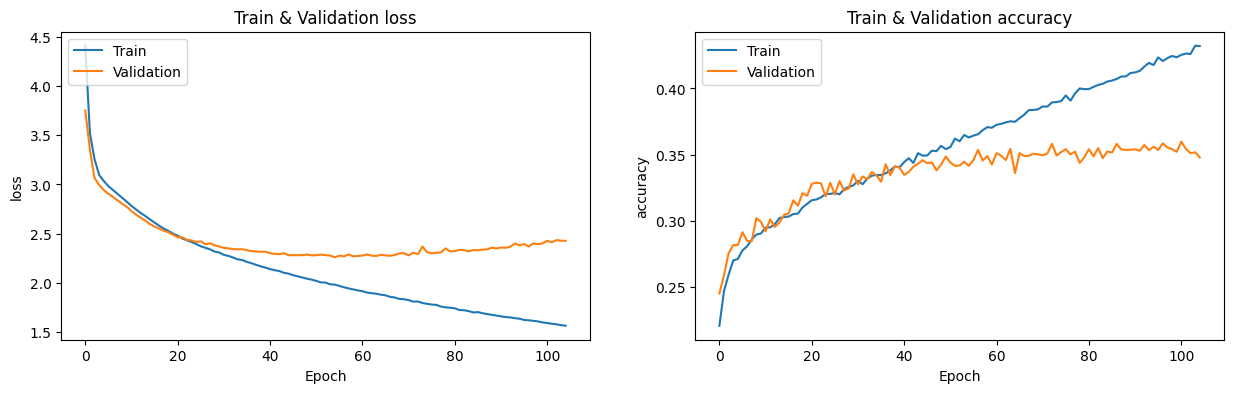

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(15, 4)); plt.subplot(121)
plt.plot(list(result_df['loss'])); plt.plot(list(result_df['val_loss']))
plt.title('Train & Validation loss'); plt.ylabel('loss'); plt.xlabel('Epoch'); plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation Accuracy values
plt.subplot(122)
plt.plot(list(result_df['accuracy'])); plt.plot(list(result_df['val_accuracy']))
plt.title('Train & Validation accuracy'); plt.ylabel('accuracy'); plt.xlabel('Epoch'); plt.legend(['Train', 'Validation'], loc='upper left')

* **Training vs. Validation Loss:** The training loss consistently decreases, indicating that the model is learning, while the validation loss stabilizes, suggesting diminishing improvement and potential overfitting after a certain point.
* **Training vs. Validation Accuracy:** Training accuracy steadily improves, but validation accuracy plateaus, indicating the model generalizes less effectively beyond the training data after early epochs.

In [ ]:
model_lstm_vgg19.save('/content/drive/MyDrive/Hemanth/VQA/model/model_2lstm_vgg19_50k.h5')

## 4.6 Model Testing

In [ ]:
def accuracy_metric(X,Y,encoded_features,model):
  # Ensure encoded_features[0] and encoded_features[1] have same number of samples
  # Note this is assuming encoded_features is a list of 2 with [que,image]
  # If its different please adjust accordingly
  assert encoded_features[0].shape[0] == encoded_features[1].shape[0], "Number of samples in questions and images do not match"

  predicted_Y = model.predict(encoded_features,verbose=0)
  predicted_class = tf.argmax(predicted_Y, axis=1, output_type=tf.int32)
  predicted_ans = labelencoder.inverse_transform(predicted_class)

  acc_val_lst = []
  for i in tqdm(range(len(Y))):
    acc_val = 0.0
    temp = 0

    for actual_ans in (list(X['answers'])[i]).split(","):
      if actual_ans == predicted_ans[i]:
        temp += 1

    if temp >= 3:
      acc_val = 1
    else:
      acc_val = float(temp)/3

    acc_val_lst.append(acc_val)

  return (sum(acc_val_lst)/len(Y))*100, acc_val_lst

In [ ]:
@register_keras_serializable()
def custom_multiply(tensors):
  """
  Performs element-wise multiplication of two tensors.
  This assumes the input is a list of two tensors.

  Args:
      tensors: A list of two tensors to multiply.

  Returns:
      The element-wise product of the two tensors.
  """
  return tensors[0] * tensors[1]

# Load the model with custom_objects
model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Hemanth/VQA/model/model_2lstm_vgg19_50k_T5.h5',
    custom_objects={'custom_multiply': custom_multiply}
)

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/final_model_T5.pkl', 'rb'))

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
colab_path = "/content/drive/MyDrive/Hemanth/VQA/Dataset"
test_image= pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_image_50k_0711.pkl', 'rb'))
test_image= pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_image_50k_0711.pkl', 'rb'))
tokenizer_50k = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/tokenizer_50k.pkl', 'rb'))
#model = tf.keras.models.load_model('/content/drive/MyDrive/Hemanth/VQA/model/model_2lstm_vgg19_50k_T5.h5')
labelencoder = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/labelencoder.pkl', 'rb'))
X_test,y_test = pickle.load(open('/content/drive/MyDrive/Hemanth/VQA/model/test_50k_0711.pkl', 'rb'))

test_sequences = tokenizer_50k.texts_to_sequences(list(X_test['question_preprocessed']))
test_que = pad_sequences(test_sequences, maxlen=22, padding='post')
print(test_image.shape, test_que.shape)

(4590, 224, 224, 3) (4590, 22)


In [ ]:
test_image_path = list(X_test['image_id'])
test_question = list(X_test['question_preprocessed'])
test_answer = list(y_test)

# Plot test images, questions, actual answers and predicted answers
# Increased figure size for better visualization with 30 subplots
fig = plt.figure(figsize=(36, 30))

# Adjusted grid to 6 rows x 5 columns to accommodate 30 subplots
for a, i in enumerate(list(np.arange(30))):
  fig.add_subplot(6, 5, a + 1)  # Changed grid layout to 6x5
  image_path = os.path.join(colab_path,test_image_path[i])  # Construct the full image path

  # Check if the image file exists
  if not os.path.exists(image_path):
      print(f"Error: Image file not found at {image_path}")
      continue  # Skip to the next image if the file is not found

  img = cv2.imread(image_path)

  # Check if the image was loaded successfully
  if img is None:
      print(f"Error: Failed to load image from {image_path}")
      continue  # Skip to the next image if loading failed

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img);
  plt.axis('off')
  plt.title(f'Que: {test_question[i]} \nActual Ans: {labelencoder.inverse_transform(test_answer)[i]} \nPredicted Ans: {labelencoder.inverse_transform([np.argmax(model.predict([np.array([test_que[i]]), np.array([test_image[i]])], verbose=0))])[0]}')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

Output hidden; open in https://colab.research.google.com to view.